**Problem Statement**

We have an Ecommerce Customers data of a company and The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

**Importing Neccessary Libraries**

In [327]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading Ecommerce csv file by using pandas


In [328]:
data=pd.read_csv('/content/drive/MyDrive/data reading files/Ecommerce Customers.csv')

Take look into our dataset

In [329]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [330]:
data.shape

(500, 8)

In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Checking for null values

In [332]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [333]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Exploratory data analysis (EDA)**

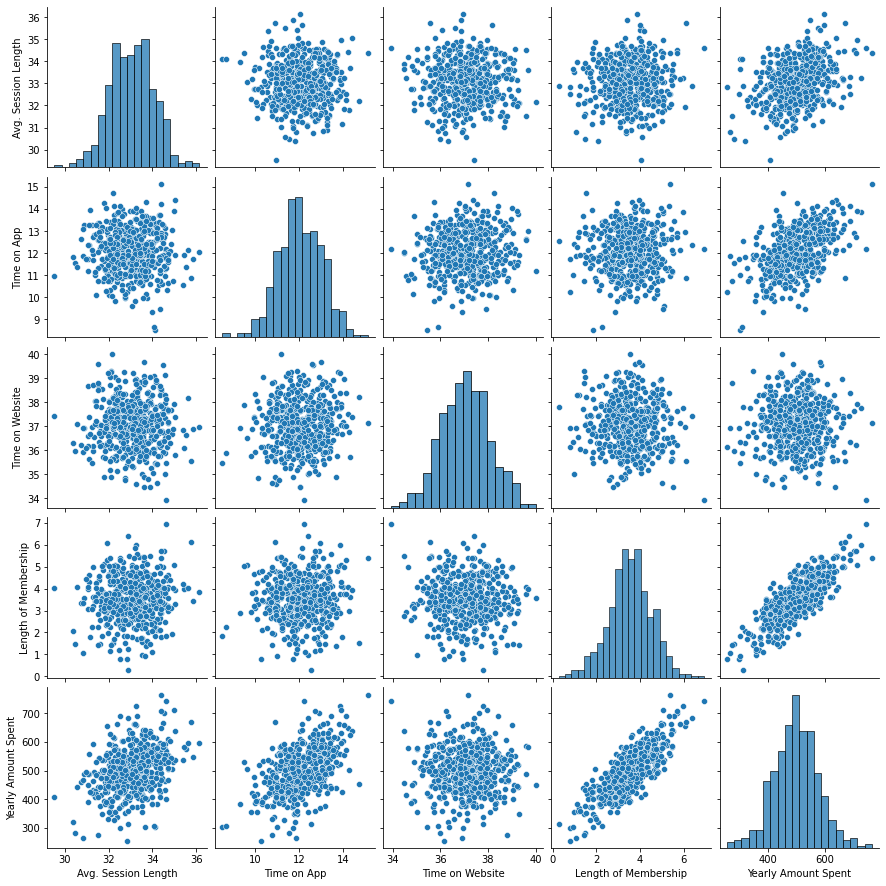

In [334]:
sns.pairplot(data)

finding outliers and removing

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


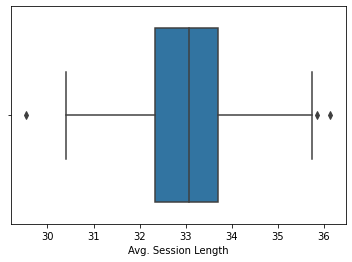

In [335]:
sns.boxplot(data["Avg. Session Length"])

In [336]:
q25,q75=np.percentile(data["Avg. Session Length"],[25,75])
iqr=q75-q25
min_o=q25-(1.5*iqr)
max_o=q75+(1.5*iqr)
print(min(data["Avg. Session Length"]),min_o,q25,q75,max_o,max(data["Avg. Session Length"]))


29.532428967057943 30.28657747536273 32.34182200451777 33.71198502395447 35.767229553109516 36.13966248879052


In [337]:
ad=[x for x in data["Avg. Session Length"] if x<=max_o and x>=min_o]
len(ad)

497

In [338]:
data=data[data['Avg. Session Length'].isin(ad)]
data.shape

(497, 8)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


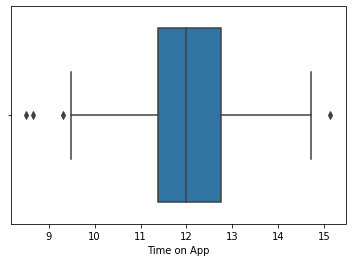

In [339]:
sns.boxplot(data["Time on App"])

In [340]:
q25,q75=np.percentile(data["Time on App"],[25,75])
iqr=q75-q25
min_o=q25-(1.5*iqr)
max_o=q75+(1.5*iqr)
print(min(data["Time on App"]),min_o,q25,q75,max_o,max(data["Time on App"]))


8.508152176032603 9.332778078459471 11.38861261864104 12.759168978762087 14.815003518943657 15.126994288792469


In [341]:
ad=[x for x in data["Time on App"] if x<=max_o and x>=min_o]
len(ad)

493

In [342]:
data=data[data['Time on App'].isin(ad)]
data.shape

(493, 8)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


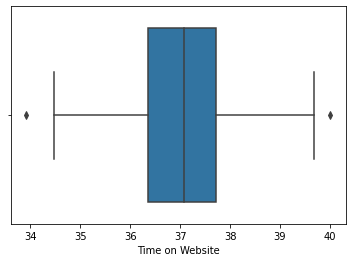

In [343]:
sns.boxplot(data["Time on Website"])

In [344]:
q25,q75=np.percentile(data["Time on Website"],[25,75])
iqr=q75-q25
min_o=q25-(1.5*iqr)
max_o=q75+(1.5*iqr)
print(min(data["Time on Website"]),min_o,q25,q75,max_o,max(data["Time on Website"]))
ad=[x for x in data["Time on Website"] if x<=max_o and x>=min_o]
print(len(ad))
data=data[data['Time on Website'].isin(ad)]
print(data.shape)

33.91384724758464 34.297706257038925 36.35250276938114 37.72236711094261 39.77716362328482 40.005181638101895
491
(491, 8)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


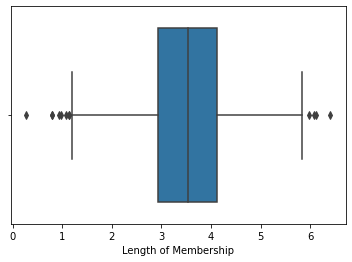

In [345]:
sns.boxplot(data["Length of Membership"])

In [346]:
q25,q75=np.percentile(data["Length of Membership"],[25,75])
iqr=q75-q25
min_o=q25-(1.5*iqr)
max_o=q75+(1.5*iqr)
print(min(data["Length of Membership"]),min_o,q25,q75,max_o,max(data["Length of Membership"]))
ad=[x for x in data["Length of Membership"] if x<=max_o and x>=min_o]
print(len(ad))
data=data[data['Length of Membership'].isin(ad)]
print(data.shape)

0.2699010899842742 1.1428667219770978 2.933598404195819 4.127419525674966 5.918151207893688 6.401228837806773
479
(479, 8)


After removing outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


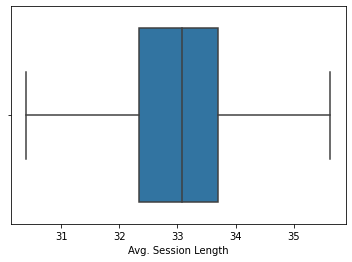

In [347]:
sns.boxplot(data["Avg. Session Length"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


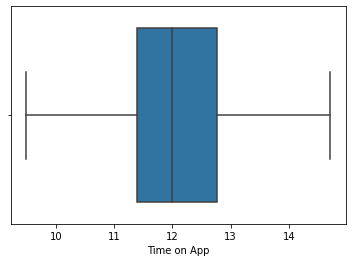

In [348]:
sns.boxplot(data["Time on App"])


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


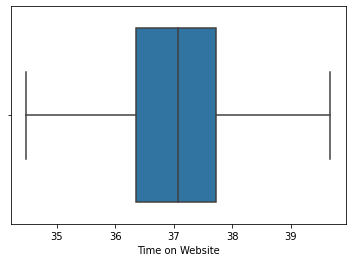

In [349]:
sns.boxplot(data["Time on Website"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


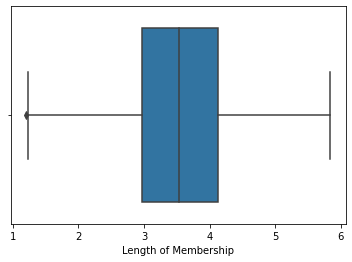

In [350]:
sns.boxplot(data["Length of Membership"])

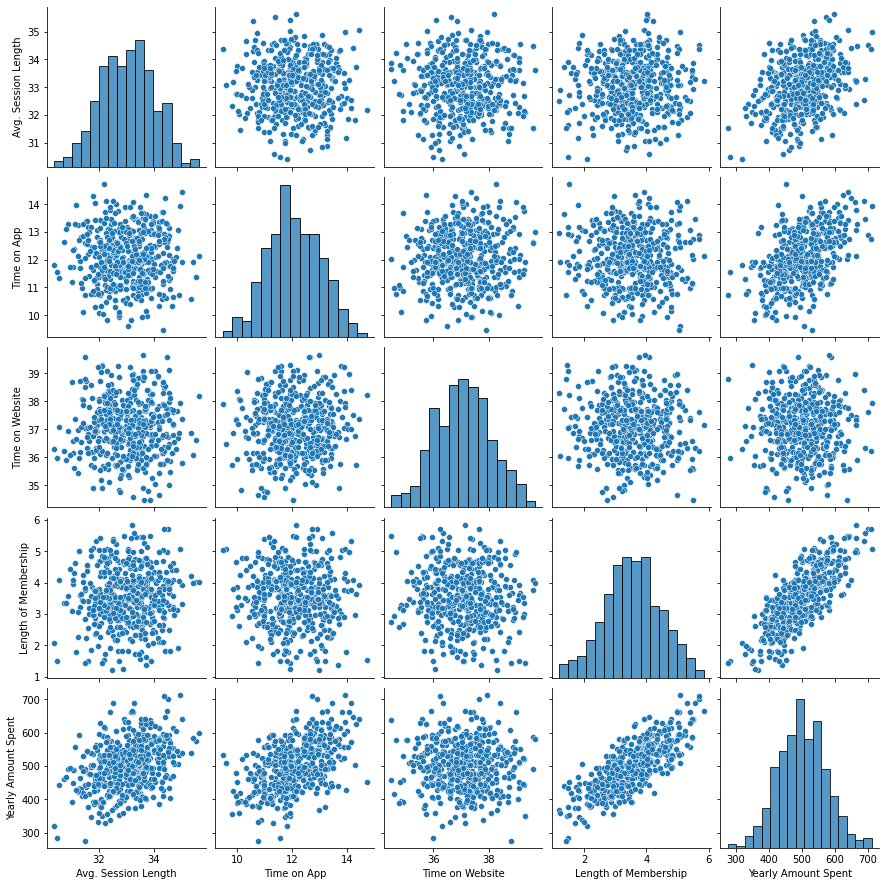

In [351]:
sns.pairplot(data)

Checking for Correlation

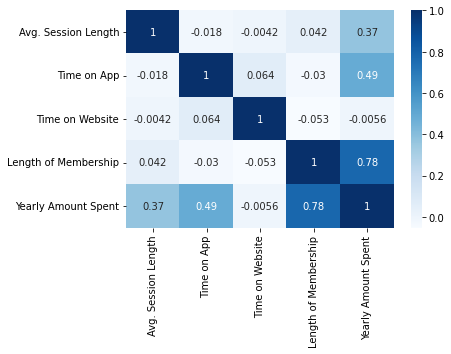

In [352]:
sns.heatmap(data.corr(),cmap = 'Blues', annot=True)

**Building Model**

In [353]:
X=data.iloc[:,3:-1]
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [354]:
Y=data.iloc[:,-1:]
Y

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092
...,...
495,573.847438
496,529.049004
497,551.620145
498,456.469510


In [355]:
from sklearn.model_selection import train_test_split

splitting training set and test set

In [356]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [357]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
88,31.956301,12.828893,36.951617,4.571213
489,32.246350,11.305551,37.133127,1.707390
393,32.319858,12.418113,36.155336,3.222081
186,32.484260,10.933252,36.545506,3.261325
446,33.499506,11.946591,36.486325,3.937863
...,...,...,...,...
110,31.853075,12.149375,37.325334,3.361815
282,31.654810,13.014459,37.789036,3.010210
363,34.179518,12.581548,35.444265,3.137069
456,32.767076,11.076259,34.779751,2.574948


In [358]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
97,34.183821,13.349913,37.827394,4.252006
334,31.976480,10.757131,36.595868,1.977007
57,34.301870,10.568295,36.173126,3.315225
31,33.461056,10.869164,35.622442,3.471413
470,32.518197,11.509253,36.599289,3.022676
...,...,...,...,...
18,32.187812,14.715388,38.244115,1.516576
70,33.154176,11.887494,36.265001,2.602287
166,33.630801,12.039648,38.924087,2.873008
90,32.491447,12.530357,37.875219,2.476139


In [359]:
Y_train

,Yearly Amount Spent
88,547.125932
489,327.377953
393,482.830986
186,425.745092
446,529.194519
...,...
110,459.285123
282,475.263424
363,527.782996
456,388.940549


In [360]:
Y_test

,Yearly Amount Spent
97,614.715334
334,330.594446
57,453.169502
31,447.687907
470,424.728774
...,...
18,452.315675
70,444.966552
166,497.811930
90,449.070319


Fitting Linear Regression model

In [361]:
from sklearn.linear_model import LinearRegression

In [362]:
regressor=LinearRegression()

In [363]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [364]:
Y_pred=regressor.predict(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


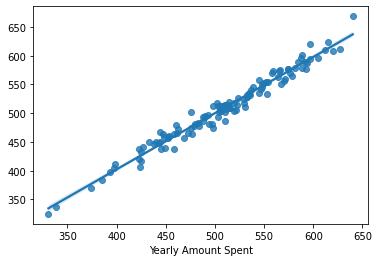

In [365]:
sns.regplot(Y_test,Y_pred)

In [366]:
from sklearn.metrics import r2_score

In [367]:
score=r2_score(Y_test,Y_pred)

In [368]:
score

0.9708941995147561

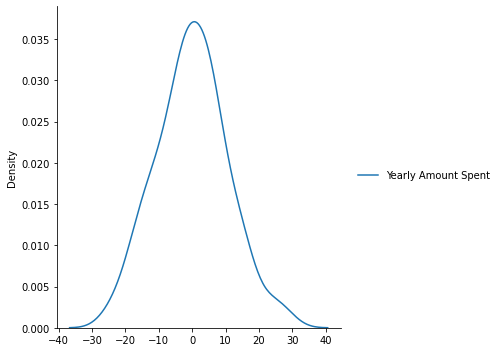

In [369]:
sns.displot(Y_pred-Y_test,kind='kde')


Scaling our Feature values

In [370]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [371]:
Y_train=Y_train['Yearly Amount Spent']
Y_test=Y_test['Yearly Amount Spent']


In [372]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-1.06930737,  0.7902489 , -0.12858373,  1.11290163],
       [-0.77640932, -0.78220914,  0.05236629, -1.9326324 ],
       [-0.70217941,  0.3662242 , -0.92240725, -0.32183361],
       ...,
       [ 1.17574418,  0.53492824, -1.63128472, -0.41223943],
       [-0.25056911, -1.01889414, -2.29374853, -1.01002671],
       [-0.73055728,  0.13124568, -0.9252725 ,  0.27342454]])

In [373]:
X_test=scaler.transform(X_test)
X_test

array([[ 1.18008940e+00,  1.32806733e+00,  7.44491566e-01,
         7.73440906e-01],
       [-1.04892969e+00, -1.34831200e+00, -4.83234792e-01,
        -1.64590767e+00],
       [ 1.29929847e+00, -1.54323676e+00, -9.04672717e-01,
        -2.22779598e-01],
       [ 4.50226794e-01, -1.23266691e+00, -1.45365677e+00,
        -5.66806637e-02],
       [-5.01892653e-01, -5.71939293e-01, -4.79824206e-01,
        -5.33890943e-01],
       [-1.97307247e+00,  3.03799251e-01, -9.11734857e-01,
         6.00443831e-01],
       [-3.76927739e-01, -4.89674611e-01, -7.56117225e-01,
        -3.56364720e-01],
       [-1.51520673e+00,  5.49507192e-01,  2.51200319e+00,
         2.41426922e-01],
       [ 6.31365951e-02, -6.15571386e-01, -1.40053598e+00,
        -1.82433076e+00],
       [-1.08925330e+00, -2.57234579e-01,  6.43705976e-02,
        -3.42331291e-01],
       [-3.45626151e-01,  2.19587764e-01,  1.11848956e-01,
         4.86804236e-01],
       [ 3.57651079e-01,  1.64287402e-01, -7.23125371e-01,
      

In [374]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [375]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [376]:
mse=cross_val_score(regressor,X_train,Y_train,scoring='neg_mean_squared_error',cv=10)

In [377]:
np.mean(mse)

-99.1157447938493

In [378]:
mse

array([ -94.9672817 , -127.04168331,  -89.92658191,  -85.09898919,
       -113.36814476,  -97.43379365,  -93.19812331,  -96.97732414,
        -89.65632454, -103.48920141])

Ridge Model

In [379]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_regressor=Ridge()

In [380]:
parameters={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)

In [381]:
ridgecv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='neg_mean_squared_error')

In [382]:
ridgecv.best_params_

{'alpha': 1e-05}

In [383]:
ridgecv.best_score_

-99.38106627537002

In [384]:
rid_pred=ridgecv.predict(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


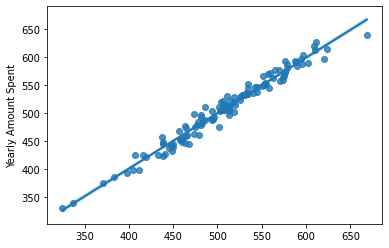

In [385]:
sns.regplot(rid_pred,Y_test)

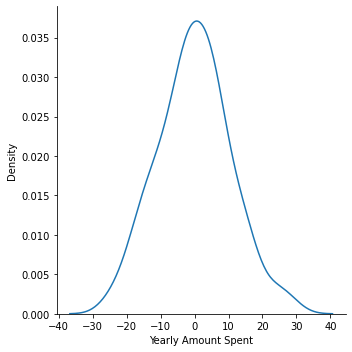

In [386]:
sns.displot(rid_pred-Y_test,kind='kde')

In [387]:
score=r2_score(rid_pred,Y_test)

In [388]:
score

0.9704149832099824

Lasso model

In [389]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [390]:
parameters={'alpha':[1,2,3,4,5,6]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [1, 2, 3, 4, 5, 6]},
             scoring='neg_mean_squared_error')

In [391]:
lassocv.best_params_

{'alpha': 1}

In [392]:
lassocv.best_score_

-101.96478093028728

In [393]:
lasso_pred=lassocv.predict(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


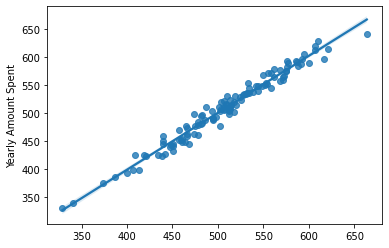

In [394]:
sns.regplot(lasso_pred,Y_test)

In [395]:
score=r2_score(lasso_pred,Y_test)

In [396]:
score

0.9691210776745609

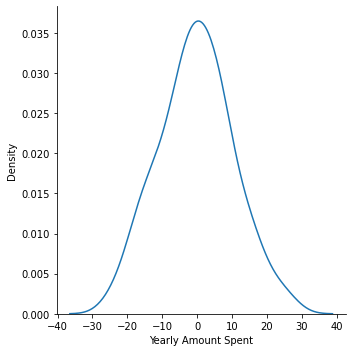

In [397]:
sns.displot(lasso_pred-Y_test,kind='kde')

In [398]:
regressor.score(X_train,Y_train),'training accuracy'

(0.9828179031057599, 'training accuracy')

In [399]:
regressor.score(X_test,Y_test),'testing accuracy'

(0.9708941995147561, 'testing accuracy')

**Summary**

In [400]:
import statsmodels.api as sm
model = sm.OLS(Y,X).fit()
print(model.summary())
print(" Traing Accuracy",regressor.score(X_train,Y_train),"\n","Testing Accuracy",regressor.score(X_test,Y_test))
     

                                 OLS Regression Results                                 
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          6.003e+04
Date:                 Tue, 03 Jan 2023   Prob (F-statistic):                        0.00
Time:                         09:37:26   Log-Likelihood:                         -2170.6
No. Observations:                  479   AIC:                                      4349.
Df Residuals:                      475   BIC:                                      4366.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [401]:
cofe = pd.DataFrame(regressor.coef_,index=data.columns[3:-1])
cofe

,0
Avg. Session Length,25.808577
Time on App,37.954961
Time on Website,0.320272
Length of Membership,57.733026


**Conclusion**

As our R square and abjusted R square scores is good, we can conclude that our model was good at predecting

from the above data the company should focus on mobile app